In [1]:
# Lab 3, predicting types of movement using accelerometer data

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
"""
https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+from+Single+Chest-Mounted+Accelerometer


Dataset Information
   --- Data are separated by participant
   --- Each file contains the following information
       ---- sequential number, x acceleration, y acceleration, z acceleration, label 
   --- Labels are codified by numbers
       --- 1: Working at Computer
       --- 2: Standing Up, Walking and Going up\down stairs
       --- 3: Standing
       --- 4: Walking
       --- 5: Going Up\Down Stairs
       --- 6: Walking and Talking with Someone
       --- 7: Talking while Standing
"""

In [2]:
accel = pd.read_csv('../data/accelerometer_1.csv', header=None) # there is no header column

In [ ]:
accel.head()

In [ ]:
accel.shape

In [ ]:
# Beginner Level

In [3]:
# 0. This dataframe has no headers, change that so the column names are
# ['id', 'x', 'y', 'z', 'label']

header_row = ['id', 'x', 'y', 'z', 'label']
accel.columns = header_row


In [ ]:
accel.head()

In [42]:
# 1. Do we have any missing values?

print len(accel)
accel.describe()

162500


,id,x,y,z
count,162500.000000,162500.000000,162500.000000,162500.000000
mean,81249.500000,1910.670788,2380.286326,2041.214603
std,46909.853797,40.653323,41.925853,59.529519
min,0.000000,1455.000000,1697.000000,1644.000000
25%,40624.750000,1886.000000,2374.000000,1991.000000
50%,81249.500000,1905.000000,2381.000000,2022.000000
75%,121872.500000,1935.000000,2386.000000,2101.000000
max,162500.000000,2356.000000,2713.000000,2739.000000


In [4]:
# 2. print the value counts for the albel column of accel

print accel['label'].value_counts()

7    83748
1    33677
4    26860
3    11179
5     3191
6     2917
2      928
0        1
Name: label, dtype: int64


In [5]:
# 3. Remove any rows where the label column is not 1 - 7

labels = accel['label'].unique()
print labels

accel = accel[accel.label != 0]

accel.describe()

[1 2 3 4 5 6 7 0]


,id,x,y,z,label
count,162500.000000,162500.000000,162500.000000,162500.000000,162500.000000
mean,81249.500000,1910.670788,2380.286326,2041.214603,4.899711
std,46909.853797,40.653323,41.925853,59.529519,2.424288
min,0.000000,1455.000000,1697.000000,1644.000000,1.000000
25%,40624.750000,1886.000000,2374.000000,1991.000000,3.000000
50%,81249.500000,1905.000000,2381.000000,2022.000000,7.000000
75%,121872.500000,1935.000000,2386.000000,2101.000000,7.000000
max,162500.000000,2356.000000,2713.000000,2739.000000,7.000000


In [6]:
print accel['label'].value_counts()

7    83748
1    33677
4    26860
3    11179
5     3191
6     2917
2      928
Name: label, dtype: int64


In [7]:
# 4. replace the numbers in the label column with the word counterpart:
    # example 1's become 'Working at Computer', 4's become "Walking"
    
'''
       --- 1: Working at Computer
       --- 2: Standing Up, Walking and Going up\down stairs
       --- 3: Standing
       --- 4: Walking
       --- 5: Going Up\Down Stairs
       --- 6: Walking and Talking with Someone
       --- 7: Talking while Standing''
'''

word_labels = ['Working at Computer', 'Standing Up, Walking and Going up\down stairs', 'Standing', 'Walking', 'Going Up\Down Stairs', 'Walking and Talking with Someone', 'Talking while Standing' ]

def update_labels(row):
    
    label = int(row['label'])
    new_label = word_labels[label - 1]
    return new_label

accel['label'] = accel.apply(update_labels, axis=1)

print accel['label'].value_counts()


Talking while Standing                           83748
Working at Computer                              33677
Walking                                          26860
Standing                                         11179
Going Up\Down Stairs                              3191
Walking and Talking with Someone                  2917
Standing Up, Walking and Going up\down stairs      928
Name: label, dtype: int64


Talking while Standing                           83748
Working at Computer                              33677
Walking                                          26860
Standing                                         11179
Going Up\Down Stairs                              3191
Walking and Talking with Someone                  2917
Standing Up, Walking and Going up\down stairs      928
Name: label, dtype: int64


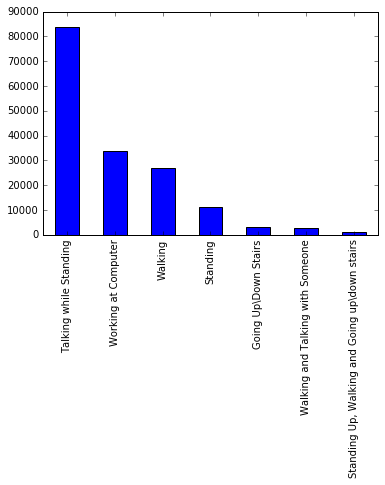

In [8]:
# 5. Plot the number of times each label occurs using a bar char

#ufo.shape_reported.value.count().plot(kind='bar')

print accel['label'].value_counts()

accel['label'].value_counts().plot(kind='bar')

In [9]:
# 6. Talking while Standing is the most common label, 
# what is the null accuracy rate for this data set
# The null accuracy is equal to the number of times the most 
# common response element occurs divided by the total number of rows
# Talking while Standing                           0.515372

#accel[accel.label == 'Talking while Standing'].count()

from __future__ import division

most_frequent = accel['label'].value_counts()[0]
#print most_frequent
total_rows = len(accel)
#print total_rows

null_accuracy = most_frequent/total_rows
print null_accuracy


0.515372307692


In [10]:
# 7. Make an X and a y variable with X being only the x, y, and z columns
# while y is the label column

X, y = accel.drop(accel.columns[[0, 4]], axis=1), accel['label']
#X, y = accel.drop(accel.columns[['id', 'label']], axis=1), accel['label']

print X.shape
print y.shape

(162500, 3)
(162500,)


In [11]:
# 8. Fit a KNN model with 3 neighbors and print the accuracy of that model
# Did you do better than the null model?

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y) 
knn.score(X, y)

0.88682461538461543

In [12]:
# 9. print the accuracy of predicting the label column using each column individually
# Ie fit 3 different KNN models, 
# a KNN model with K=3 for each of the x, y, and z columns

X, y = accel.drop(accel.columns[[0, 2, 3, 4]], axis=1), accel['label']
#X, y = accel['x'], accel['label']

#print X.shape
#print y.shape

print "score for x:"

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y) 
print knn.score(X, y)

X, y = accel.drop(accel.columns[[0, 1, 3, 4]], axis=1), accel['label']

print "score for y:"

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y) 
print knn.score(X, y)

X, y = accel.drop(accel.columns[[0, 1, 2, 4]], axis=1), accel['label']

print "score for z:"

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y) 
print knn.score(X, y)


score for x:
0.648049230769
score for y:
0.642196923077
score for z:
0.625636923077


In [ ]:
# Intermediate Level

In [15]:
# 10. Create a list called scores that holds 29 different accuracys, 
# one for each value of K between 1 and 29
# Use all three columns for each model

scores = []
X, y = accel.drop(accel.columns[[0, 4]], axis=1), accel['label']

for i in np.arange(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, y) 
    iscore = knn.score(X, y)
    scores.append(iscore)

print scores


[0.96633230769230771, 0.88388923076923076, 0.88682461538461543, 0.87748307692307692, 0.87505846153846156, 0.87161230769230769, 0.87007999999999996, 0.86812307692307689, 0.86747692307692303, 0.86657230769230764, 0.86561846153846156, 0.86496615384615383, 0.86491692307692303, 0.86371076923076928, 0.86340307692307694, 0.86336615384615389, 0.86305846153846155, 0.86270153846153841, 0.86247384615384615, 0.86219692307692308, 0.86204307692307691, 0.8616553846153846, 0.86154461538461535, 0.86118769230769232, 0.86107692307692307, 0.8609969230769231, 0.86098461538461535, 0.86060923076923079, 0.86037538461538465]


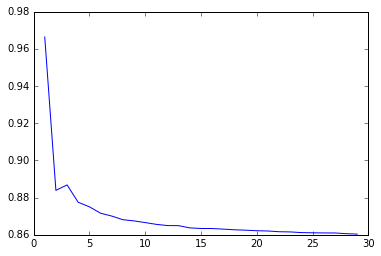

In [14]:
# 11. Make a graph that plots the number of K on the x axis and the accuracy of a KNN model on the y axis

x = np.arange(1,30)
y = scores
plt.plot(x, y)

In [ ]:
# Why do you think that the accuracy keeps going down? We will discuss this phenomenom more on Wednesday

In [ ]:
# ADVANCED Level

In [16]:
# 12. create a new dataframe called X_scaled which
# is the scaled version of the X dataframe

from sklearn.preprocessing import StandardScaler
s = StandardScaler()

# standard scalr can only take in numpy arrays, no dataframes
#X_scaled = s.fit_transform(X[['petal_length', 'petal_width']].as_matrix())
X_scaled = s.fit_transform(X.as_matrix())

X_scaled[:5,] # first five rows

/Users/alexlove/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/alexlove/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-10.05261103,  -3.94236067,   1.87782031],
       [ -5.99388975,  -7.35315447,   0.09718564],
       [ -7.37139516, -10.09610053,  -2.27139443],
       [ -7.61737826, -10.52543121,  -3.53127745],
       [ -6.58424921,  -9.90528689,  -2.72495232]])

In [17]:
# not scaled

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
knn.score(X, y)

0.88682461538461543

In [18]:
#  scaled

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)
knn.score(X_scaled, y)

0.88762461538461535

In [ ]:
# 13. Why do you think there was very little difference?

In [37]:
# 14. binarize the response (turn it into a binary response problem)
# create a new column called "binary_label" which is either "stationary", "mobile
# "binary_label is "stationary" if the person is stationary (1, 3, 7)
# "binary_label is "mobile" if the person is mobile (2, 4, 5, 6)


#accel['movement_type'] = accel.apply(lambda row: 'stationary' if row['label']==1|row['label']==3|row['label']==7 else 'mobile', axis=1)

#accel['movement_type'] = accel.apply(lambda row: 'stationary' if row['label']==1 else 'mobile', axis=1)
#accel['movement_type'] = accel.apply(lambda row: 'stationary' if row['label']==1, axis=1)


def assign_movement_type(row):
    label = row['label'] 
    if label == 'Working at Computer':
        return 'stationary'
    elif label == 'Standing':
        return 'stationary'
    elif label == 'Talking while Standing':
        return 'stationary'
    else:
        return 'mobile'

accel['movement_type'] = accel.apply(assign_movement_type, axis=1)

accel['movement_type'].value_counts()

stationary    128604
mobile         33896
Name: movement_type, dtype: int64

In [ ]:
accel.head()

In [39]:
# 15. find the null accuracy of the new binary problem

# The null accuracy is equal to the number of times the most 
# common response element occurs divided by the total number of rows

most_frequent = accel['movement_type'].value_counts()['stationary']
print most_frequent
total_rows = len(accel)
print total_rows

null_accuracy = most_frequent/total_rows
print null_accuracy

# stationary    0.791409

128604
162500
0.791409230769


In [40]:
# 16. create a new variable, "y_binary" which is the binary_label column

y_binary = accel['movement_type']

In [41]:
# 17. Fit a KNN with K=3 to this binary problem and print out the accuracy

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y_binary)
knn.score(X, y_binary)


0.95848